Project Objective: The goal of this project is to predict customer churn based on various features related to customer characteristics and subscription details. By analyzing the dataset, we aim to understand the key factors that influence customer retention and apply machine learning techniques to build a model capable of predicting whether a customer will churn. This can help businesses proactively take actions to retain valuable customers and improve customer satisfaction.

Import Module Section

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

Load DS

In [2]:
# Load dataset
#df = pd.read_csv('C:/Users/Administrator/Desktop/AIDE/AIDE506 Advanced Machine Learning Topics/Final Project/Telco-Customer-Churn.csv')
df = pd.read_csv("/kaggle/input/telcocustomerchurn2/Telco-Customer-Churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3173,9766-HGEDE,Female,0,Yes,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.35,307,No
5035,3955-JBZZM,Male,0,No,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,78.80,1641.3,No
2433,8314-DPQHL,Male,0,No,No,9,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Mailed check,50.80,463.6,No
5517,7472-EQOAV,Male,1,Yes,Yes,71,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Bank transfer (automatic),86.70,6179.35,No
5122,4353-HYOJD,Female,0,Yes,Yes,27,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.85,1336.15,No
6578,3898-BSJYF,Female,0,No,Yes,10,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.3,No
5768,8679-LZBMD,Male,0,Yes,No,44,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),90.65,3974.15,No
3380,5178-LMXOP,Male,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,95.1,Yes
3695,6088-BXMRG,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.85,3089.6,No
885,4661-NJEUX,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,20.05,No


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
df[df["TotalCharges"] == ' ']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df[df["TotalCharges"] == ' ']
df['TotalCharges'] = df['TotalCharges'].replace([np.inf, -np.inf], np.nan)  
df = df.dropna(subset=['TotalCharges'])  


In the data visualization phase, We created various visualizations to gain a deeper understanding of the data. By exploring different features, we were able to identify which ones had a greater impact on the target variable. This process allowed us to make informed decisions about which features to include in our model.

We also performed various data preprocessing techniques to ensure that the data was in a suitable format for our model. This included handling missing values, encoding categorical variables, and scaling numerical variables. By performing these preprocessing steps, we were able to improve the performance of our model.

In the model training phase, We used various machine learning algorithms to train our model. We experimented with different algorithms, such as linear regression, decision trees, and random forests, to find the best one for our data. We also used techniques such as cross-validation and hyperparameter tuning to optimize our model's performance.

In the model evaluation phase, We evaluated our model's performance using various metrics, such as accuracy, precision, recall, and F1 score. We also used techniques such as cross-validation and hyperparameter tuning to optimize our model's performance.

In the model deployment phase, We deployed our model to a production environment and tested its performance. We also documented our model's performance and limitations, and made any necessary adjustments to improve its performance.

Overall, this project allowed us to gain a deeper understanding of the data and develop a robust machine learning model that could be used to make accurate predictions.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

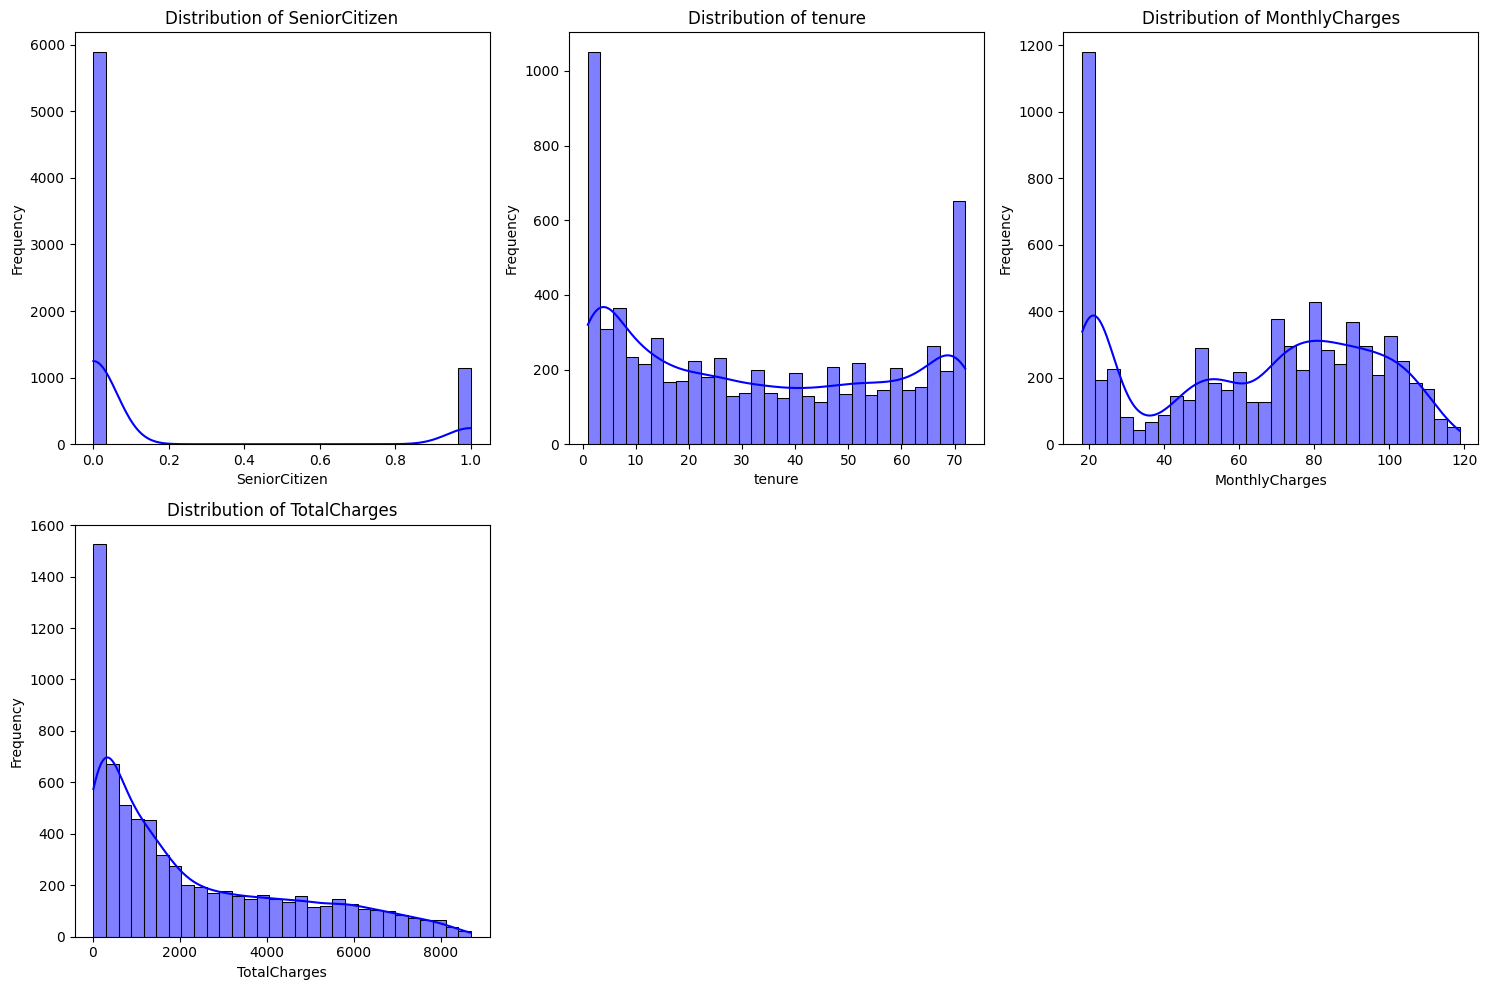

In [6]:
def plot_numeric_distributions(df):

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Set up the size of the plot grid
    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1  # 3 plots per row

    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * num_rows))

    # Loop through each numeric column and create a distribution plot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()
    
plot_numeric_distributions(df)

In [7]:
import math

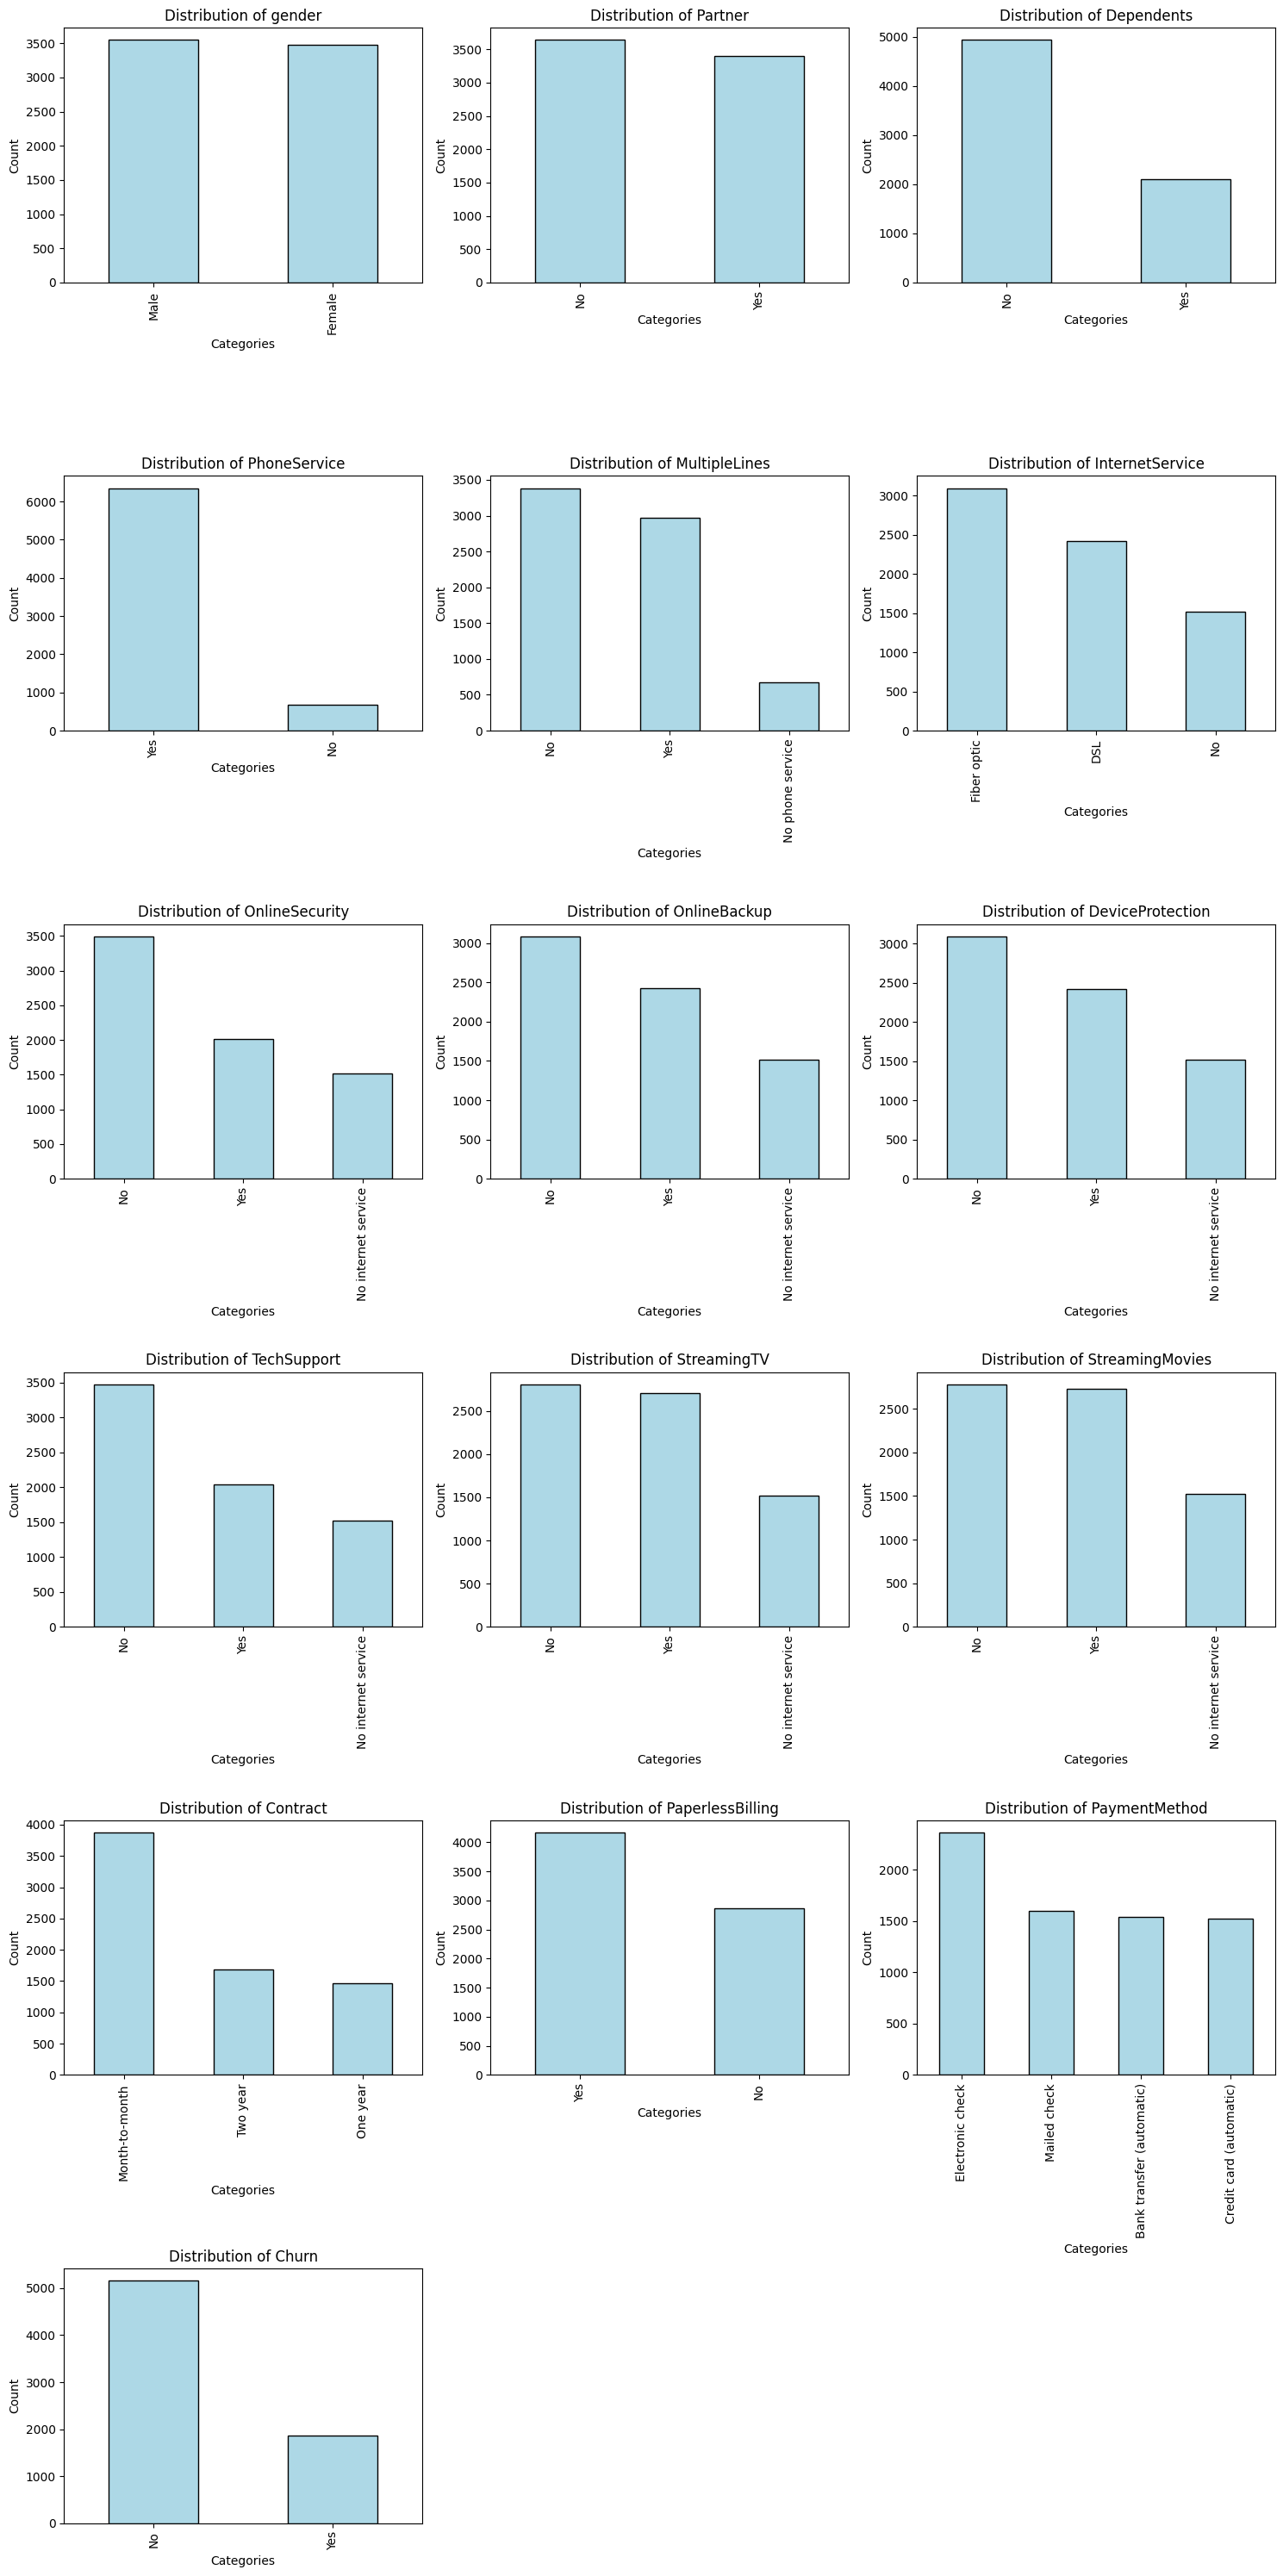

In [8]:

def plot_categorical_barcharts(df, max_unique=30):
    # Select categorical columns with less than 15 unique values
    categorical_columns = [
        col for col in df.select_dtypes(include=['object', 'category']).columns
        if df[col].nunique() < max_unique
    ]

    # Get the number of selected categorical columns
    num_columns = len(categorical_columns)

    # If no suitable columns are found, print a warning and exit
    if num_columns == 0:
        print(f"No categorical columns with less than {max_unique} unique values.")
        return

    # Determine the number of rows and columns for the plot layout
    num_rows = math.ceil(num_columns / 3)
    num_cols = min(3, num_columns)

    # Create a grid for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Plot bar chart for each categorical column
        df[col].value_counts().plot.bar(
            ax=axes[i],
            color='lightblue',
            edgecolor='black'
        )
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('Categories')

    # Remove any extra subplots if the number of columns is not a perfect multiple of 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_categorical_barcharts(df, max_unique=30)

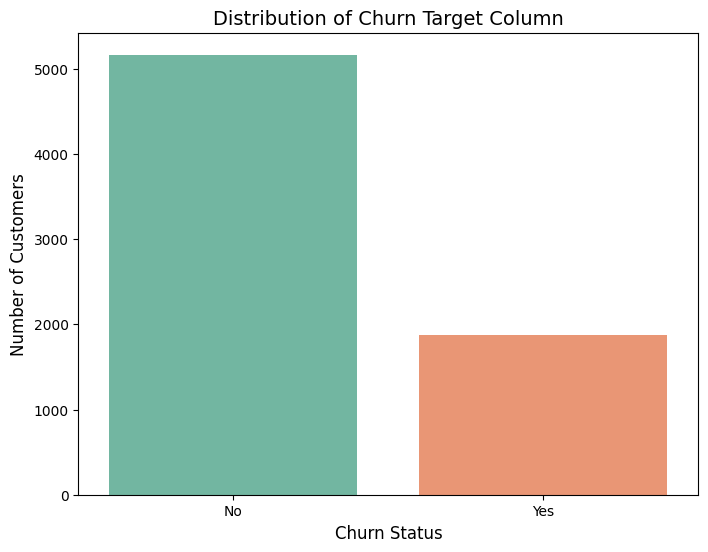

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')

plt.title('Distribution of Churn Target Column', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.show()

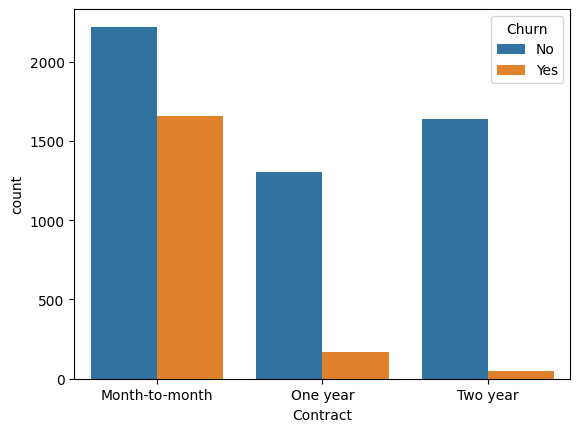

In [10]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


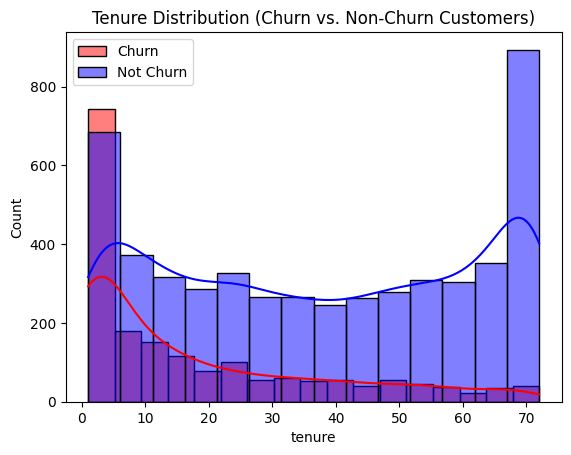

In [11]:
# Plot tenure distribution for churned and non-churned customers
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], color="red", label="Churn", kde=True)
sns.histplot(df[df['Churn'] == 'No']['tenure'], color="blue", label="Not Churn", kde=True)

# Add legend and title
plt.legend()
plt.title("Tenure Distribution (Churn vs. Non-Churn Customers)")

# Show the plot
plt.show()

Preprocessing

In [12]:
# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

# Handle missing values in TotalCharges (coerce to numeric, fill NaNs)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.fillna({'TotalCharges': 0}, inplace=True)

# Convert Churn to binary
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Encode Categorical Features

In [13]:
# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
multi_level_cols = list(set(categorical_cols) - set(binary_cols))

# Preprocess binary columns (Label Encoding)
for col in binary_cols:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])

# Preprocess multi-level columns (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), multi_level_cols)],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


Build Stacked Ensemble Model

Define Base and Meta Models

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
print('Building stacked model: Base models -> Meta model')
# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42))
]
# Meta model
meta_model = LogisticRegression(class_weight='balanced')

# Stacked model
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1,
    verbose=1
)
print('Finsihed Building stacked model!')
# Train the model
stacked_model.fit(X_train_processed, y_train)


Building stacked model: Base models -> Meta model
Finsihed Building stacked model!


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc',
                                SVC(class_weight='balanced', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=-1, stack_method='predict_proba', verbose=1)

Evaluate Model Performance

In [15]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = stacked_model.predict(X_test_processed)
y_proba = stacked_model.predict_proba(X_test_processed)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407

ROC-AUC Score: 0.8342194221699946


Generate SHAP Explanations 
Compute SHAP Values

In [16]:
import shap

# Sample background and test data for efficiency
background = shap.utils.sample(X_train_processed, 50)
test_sample = shap.utils.sample(X_test_processed, 50)
# Check if TreeExplainer can be used
if hasattr(stacked_model, "predict_proba"):
    try:
        # Use TreeExplainer for faster GPU processing
        explainer = shap.TreeExplainer(stacked_model)
        print("Using TreeExplainer for optimized SHAP calculations.")
    except:
        # Fall back to KernelExplainer if TreeExplainer is not compatible
        explainer = shap.KernelExplainer(
            model=stacked_model.predict_proba,
            data=background, 
            link='logit',
            algorithm= "auto",
            verbose=True
        )
        print("Using KernelExplainer due to model incompatibility.")
else:
    explainer = shap.KernelExplainer(
        model=stacked_model.predict_proba,
        data=background,  
        link='logit'
    )
    print("Using KernelExplainer due to predict_proba absence.")

print(f"Start calculating SHAP values. ")

# Calculate SHAP values with limited samples
shap_values = explainer.shap_values(test_sample, nsamples=100)

print(f"Finished calculating SHAP values.")


Using KernelExplainer due to model incompatibility.
Start calculating SHAP values. 


  0%|          | 0/50 [00:00<?, ?it/s]

Finished calculating SHAP values.


Visualize SHAP Summaries

What Does SHAP Summary Plot Do?
It summarizes the contribution of each feature across all samples.

Shows feature importance, indicating which features have the most impact on model predictions.

Demonstrates both the direction (positive or negative impact) and magnitude (strength) of the feature effects.

High impact on positive side: The feature increases the prediction probability.

High impact on the negative side: The feature decreases the prediction probability.

Dense clustering of dots: Indicates strong, consistent impact.

Wider spread: Indicates varying influence depending on the instance.

Adjusted Test sample shape: (50, 40)
Adjusted SHAP values shape: (50, 40)


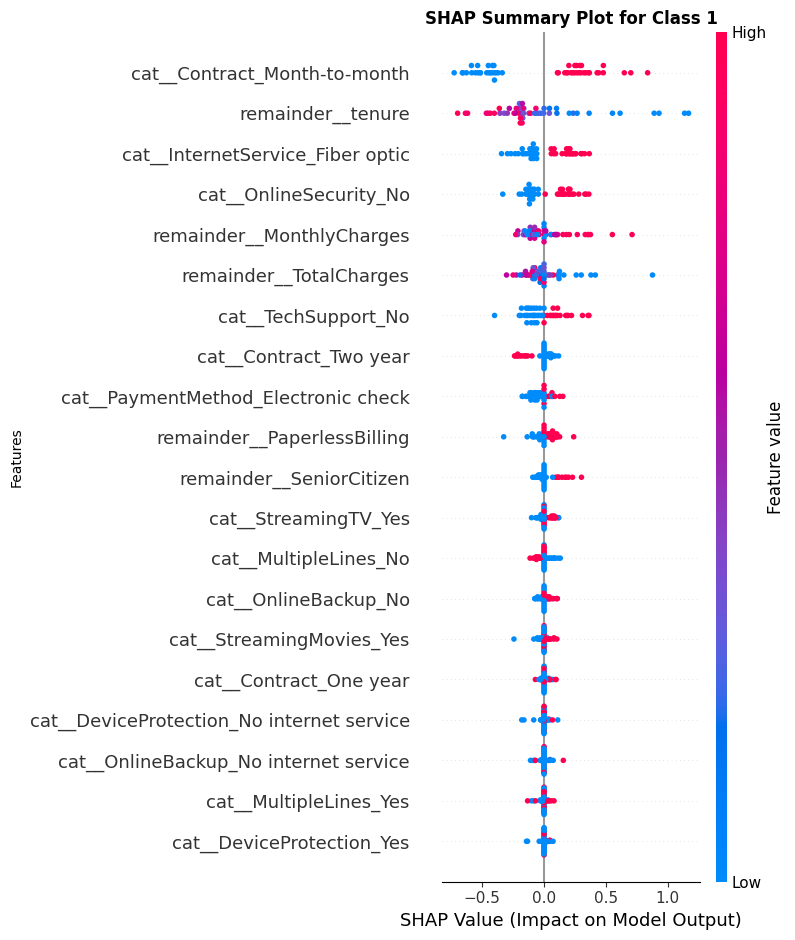

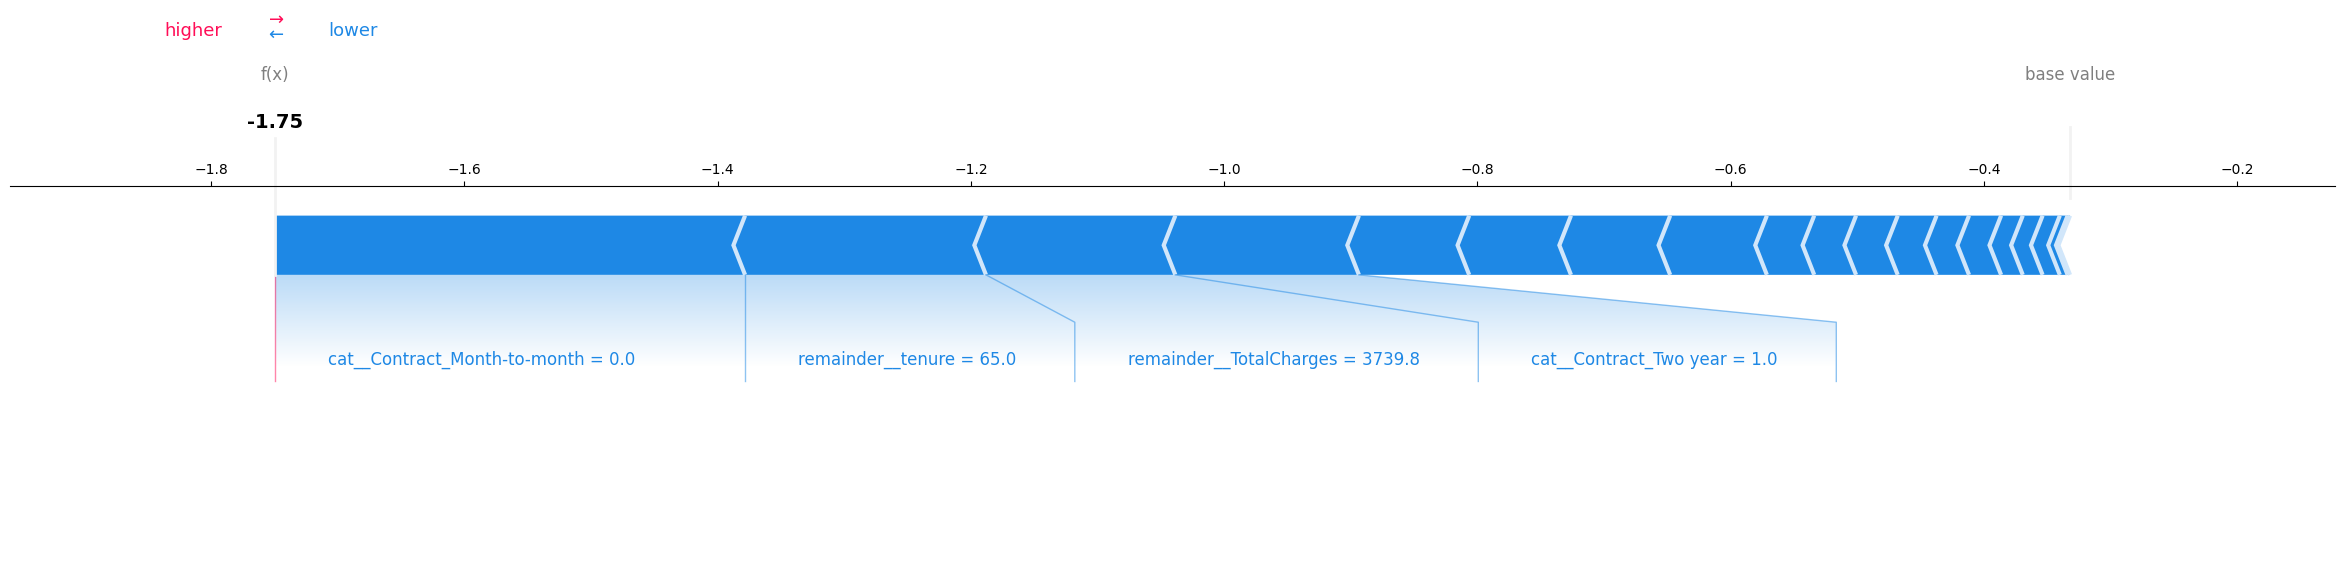

In [17]:
import matplotlib.pyplot as plt

# Ensure test_sample is a DataFrame
if isinstance(test_sample, np.ndarray):
    test_sample_df = pd.DataFrame(
        test_sample,
        columns=preprocessor.get_feature_names_out()
    )
else:
    test_sample_df = test_sample

feature_names = preprocessor.get_feature_names_out()
class_idx = 1  # Class index for positive class

# Extract SHAP values for the selected class, considering list or array structure
if isinstance(shap_values, list):
    shap_values_class1 = shap_values[class_idx]
else:
    shap_values_class1 = shap_values[:, :, class_idx]

# Adjust the test sample to match the number of SHAP value rows
num_shap_rows = shap_values_class1.shape[0]
test_sample_df = test_sample_df.iloc[:num_shap_rows]  # Adjust test data to SHAP values

# Verify alignment before plotting
print("Adjusted Test sample shape:", test_sample_df.shape)
print("Adjusted SHAP values shape:", shap_values_class1.shape)

# SHAP summary plot
shap.summary_plot(
    shap_values_class1,
    test_sample_df,
    feature_names=feature_names,
    plot_type='dot',
    show=False
)

plt.xlabel("SHAP Value (Impact on Model Output)")
plt.ylabel("Features")
plt.title(f"SHAP Summary Plot for Class {class_idx}", fontweight='bold')
plt.tight_layout()
plt.show()

# Force plot for the first sample
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values_class1[0],
    features=test_sample_df.iloc[0].values,
    feature_names=feature_names,
    matplotlib=True,
    link="identity",
    figsize=(30, 5),
    contribution_threshold=0.1
)

# Interactive force plot for all samples
shap.initjs()
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values_class1,
    test_sample_df
)
